# Gradient Descent

<img src="https://i2.wp.com/lh6.ggpht.com/-5RFMcz2bzWI/VA9NuUkB_vI/AAAAAAAAAdM/_DqqYO0nbX4/im2_thumb%25255B1%25255D.png"></img>

Gradient descent is the most important algorithm in machine learning (ML). It is used in almost all the ML models and is what differentiate traditional statistics from ML. By optimizing the parameters of the gradient descent we optimize the predictive model.
 
To understand gradient descent, we need to define some important concepts.
 
## Loss function

The loss function, also known as the cost function, is the measure we will use to calibrate the model. There are many types of loss functions. The selection of the loss function depends on the algorithm we want to run, and the question we want to answer (how we want to model the Y).
 
One of the most commonly used loss function is the Mean Squared Error (MSE). The formula of the MSE is:
 
<b> 
 MSE = Σ(y – pred)² / n
</b> 
 
This mean that we take difference between the real y and the predicted-y, square each of them, and sum all and divide by the number of rows in the dataset.


In [3]:
loss_function <- function(y,pred) { 
    return( sum((y - pred)^2)/length(y) )
}


## Global Minima
The global minima of the loss function is defined as the smallest value of the loss function. In other words, we find the global minima when we reduce the error at the lowest possible value.

<img src="https://cdn-images-1.medium.com/max/602/0*gWBpMIJ7yRVAaAIA."></img>

## Learning rate
 
The learning rate can be defined as the number of 'jumps' we make when trying to reduce the global minima while calculating the optimal values for the weights. We have to be careful with this parameter because a high value may miss out the global minima, while a very low value will increase a lot the calculation time. The learning rate parameter in many functions is called as <b> alpha </b>.

<table><tr>
    <td cols="2"> 
        <h2> Problems caused by too low or high learning rates </h2> 
    </td>
    </tr><tr>
    <td> 
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDZHOlr8UTVvLoA3adcxB7FQsVPusBU7lPSsVB-lunzaEPwahAQg" width="400" height="200"></img> 
        <br> <h4> High Learning Rate </h4>
    </td>
    <td> 
        <img src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0403.png" width="400" height="200"></img> 
        <br> <h4> Low Learning Rate </h4>
    </td>
</tr></table>

## Gradient Descent
 
The formula for the calculation of the gradient descent is:
 
<img src="https://i2.wp.com/2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s320/gradient+descent+algorithm+OLS.png?zoom=1.25&resize=320%2C181"></img>
 
This means that the values of the weights (called theta or ϴ) are calculated using the loss function (Jϴ).
 
The initial theta values are generated randomly and the loss function is calculated using them. The calculation is made as follows:
 
 
<center>
    Y-hat = ϴ<sub>0</sub> + x<sub>1</sub>ϴ<sub>1</sub> + … + x<sub>n</sub>ϴ<sub>n</sub>
</center>
 
Then the loss function is calculated. If the model did not converged (the global minima was not reached), we increase/decrease theta by the learning rate, and recalculate the newly predicted Y (Y-hat). This is repeated until the global minima is reached.
 


In [25]:
### The gradient descent requires two values: learning rate and number of iterations.

gradientDesc <- function(x, y, learn_rate=1e-6, max_iter=1e3) {
  #plot(x, y, col = "blue", pch = 20)
  conv_threshold <- 1e-4
  n <- length(y)
  m <- runif(1, 0, 1)
  c <- runif(1, 0, 1)
  yhat <- m * x + c
# sum((y - pred)^2)/length(y)
  MSE <- loss_function(y,yhat)
  converged = F
  iterations = 0
  while(converged == F) {
    ## Implement the gradient descent algorithm
    m_new <- m - learn_rate * ((1 / n) * (sum((yhat - y) * x)))
    c_new <- c - learn_rate * ((1 / n) * (sum(yhat - y)))
    m <- m_new
    c <- c_new
    yhat <- m * x + c
    MSE_new <- loss_function(y,yhat)
    if(MSE - MSE_new <= conv_threshold) {
      #abline(c, m) 
      converged = T
      print(paste("Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=MSE_new))
    }
    iterations = iterations + 1
    if(iterations > max_iter) { 
      #abline(c, m) 
      converged = T
      print(paste("Max iter: Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=MSE_new))
    }
  }
}




In [26]:
# Run the function 
gradientDesc(mtcars$disp, mtcars$mpg, 0.00002, 2500000)

gradientDesc(mtcars$disp, mtcars$mpg, 0.00001, 2500000)

gradientDesc(mtcars$disp, mtcars$mpg, 0.000001, 2500000)


[1] "Max iter: Optimal intercept: 29.5993311073439 Optimal slope: -0.0412133461899478"


w,b,loss
<dbl>,<dbl>,<dbl>
-0.04121335,29.59933,9.911209


[1] "Max iter: Optimal intercept: 29.4747109317027 Optimal slope: -0.0407912161780334"


w,b,loss
<dbl>,<dbl>,<dbl>
-0.04079122,29.47471,9.914631


[1] "Max iter: Optimal intercept: 12.507683149683 Optimal slope: 0.0166817540125962"


w,b,loss
<dbl>,<dbl>,<dbl>
0.01668175,12.50768,73.73576


In [13]:
mod <- lm(mtcars$mpg ~ mtcars$disp)
mod$coefficients
yhat<-predict(mod)
ms<-loss_function(mtcars$mpg, yhat)
ms

(Intercept) mtcars$disp 
29.59985476 -0.04121512

[1] 9.911209

In [18]:
gradientDesc(mtcars$disp, mtcars$mpg, 0.000000001, 2500000)




[1] "Optimal intercept: 0.215781091593218 Optimal slope: 0.0583185173660093"


w,b,loss
<dbl>,<dbl>,<dbl>
0.05831852,0.2157811,198.544


[1] 160.0 160.0 108.0 258.0 360.0 225.0 360.0 146.7 140.8 167.6 167.6 275.8
[13] 275.8 275.8 472.0 460.0 440.0  78.7  75.7  71.1 120.1 318.0 304.0 350.0
[25] 400.0  79.0 120.3  95.1 351.0 145.0 301.0 121.0

In [28]:
## iterating with the learning rate
library(dplyr)
res <- NULL
learning_rate <- c(1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5,5e-6,1e-6)

print(learning_rate)

for (lr in learning_rate) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, lr, 2500000)
    res <- rbind(res, data.frame(cbind(learning_rate=lr, gd)))
}


 [1] 1e-01 5e-02 1e-02 5e-03 1e-03 5e-04 1e-04 5e-05 1e-05 5e-06 1e-06
[1] "Optimal intercept: -20.7090019949155 Optimal slope: -6380.9515412328"
[1] "Optimal intercept: -5.73384941362725 Optimal slope: -1945.72123770809"
[1] "Optimal intercept: -0.0844228019759466 Optimal slope: -117.79067615527"
[1] "Optimal intercept: 0.0573232363545358 Optimal slope: -229.097970156098"
[1] "Optimal intercept: 0.598629847172276 Optimal slope: -21.6070306965251"
[1] "Optimal intercept: 0.634290171643286 Optimal slope: -13.5577660272998"
[1] "Optimal intercept: 0.284842282761095 Optimal slope: -1.59325670363332"
[1] "Optimal intercept: 0.948778641720546 Optimal slope: -0.301081714343178"
[1] "Max iter: Optimal intercept: 29.475623637402 Optimal slope: -0.0407943078160104"
[1] "Max iter: Optimal intercept: 27.6745410712352 Optimal slope: -0.03469344171465"
[1] "Max iter: Optimal intercept: 12.7304003651446 Optimal slope: 0.0159273366774202"


learning_rate,w,b,loss
<dbl>,<dbl>,<dbl>,<dbl>
1e-06,1.592734e-02,12.73040037,7.208328e+01
5e-06,-3.469344e-02,27.67454107,1.072104e+01
1e-05,-4.079431e-02,29.47562364,9.914581e+00
5e-05,-3.010817e-01,0.94877864,8.866194e+03
1e-04,-1.593257e+00,0.28484228,1.859378e+05
5e-04,-1.355777e+01,0.63429017,1.262563e+07
1e-03,-2.160703e+01,0.59862985,3.196791e+07
5e-03,-2.290980e+02,0.05732324,3.576827e+09
1e-02,-1.177907e+02,-0.08442280,9.460011e+08


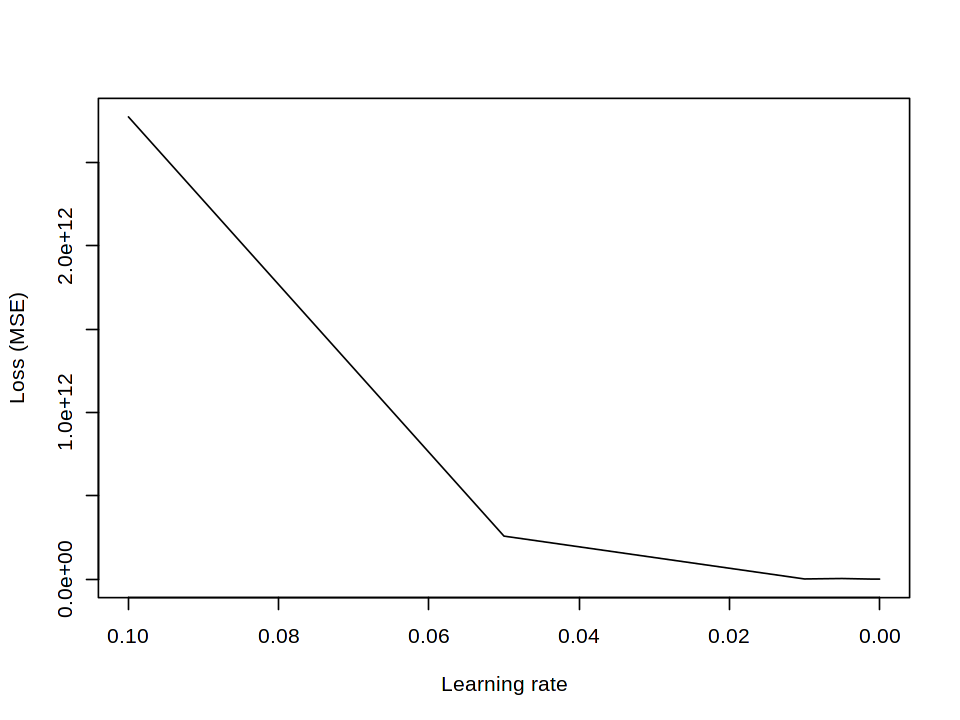

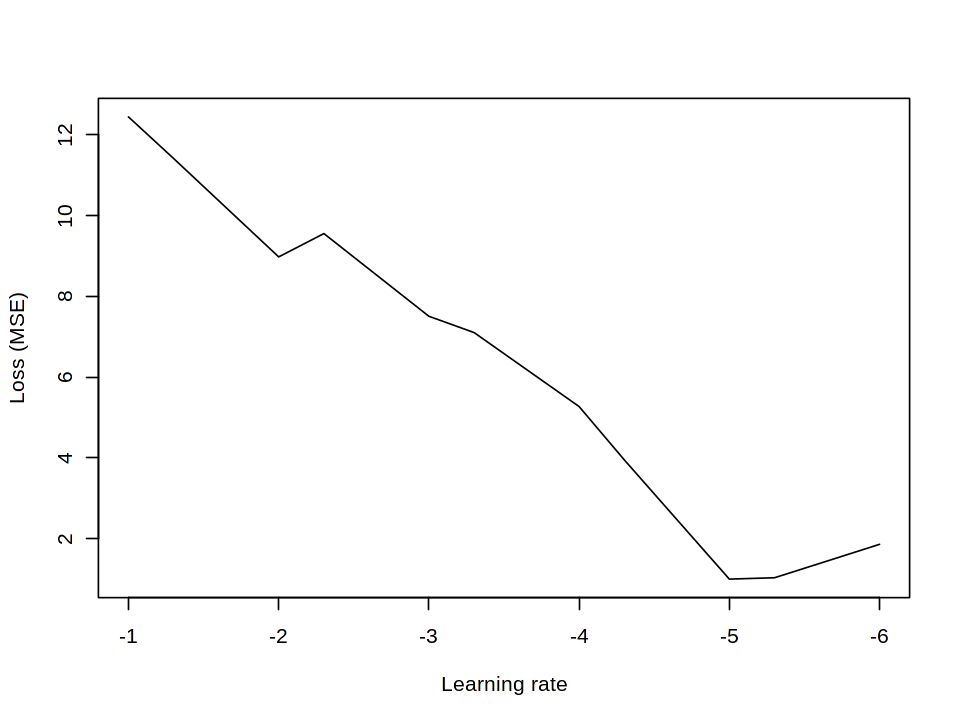

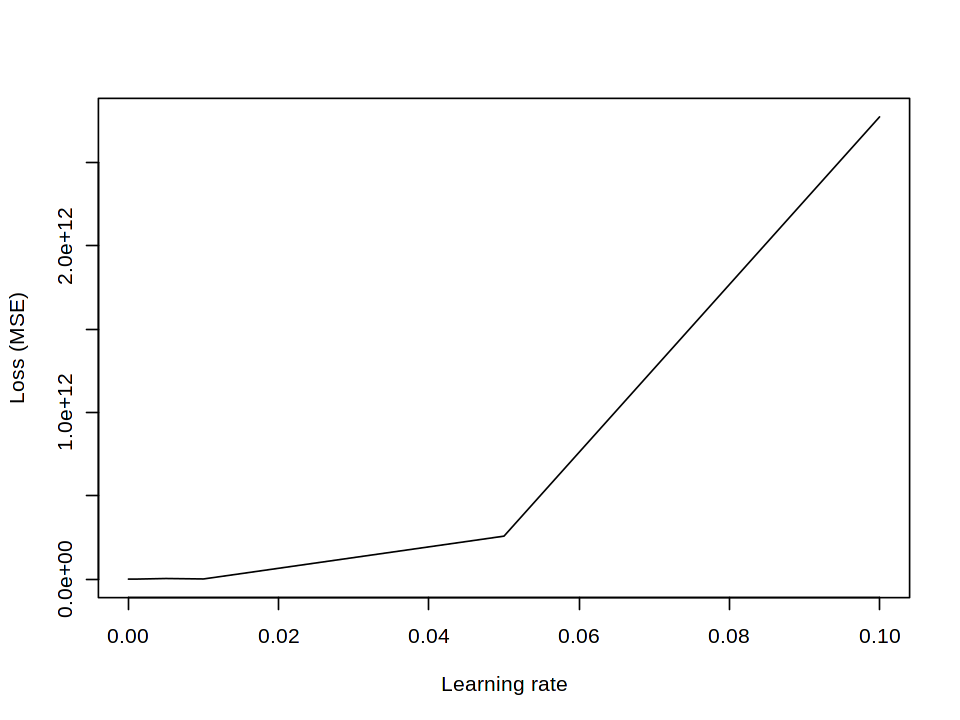

[1] -3
[1] -4


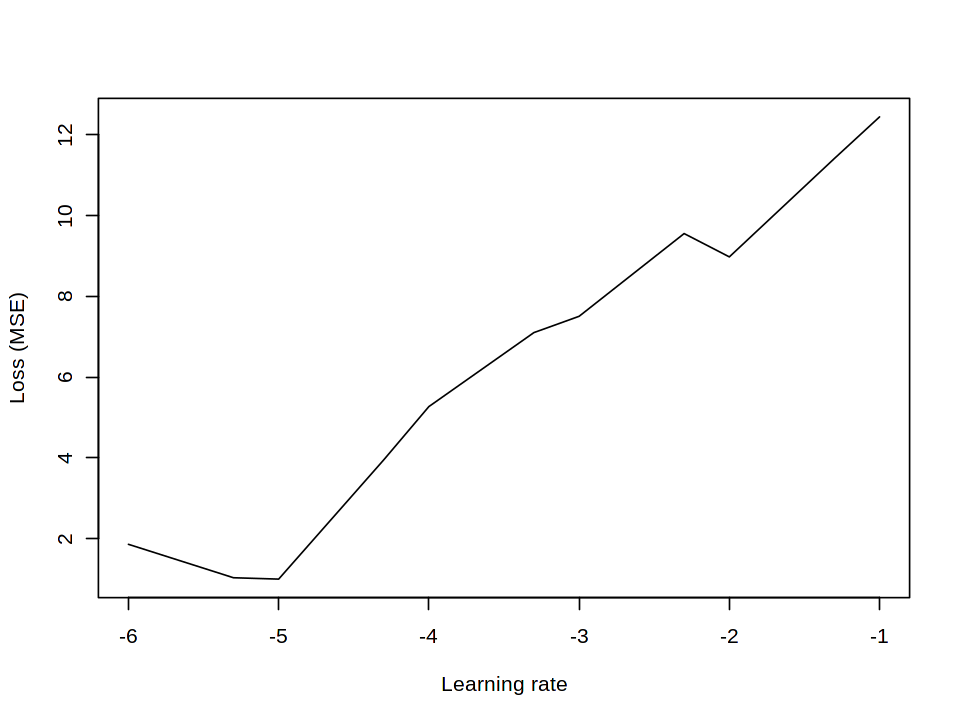

In [37]:
options(repr.plot.width = 8, repr.plot.height = 6)
res <- res %>% arrange(learning_rate)
res

plot(res$loss ~ res$learning_rate, type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(res$learning_rate)))

plot(log10(res$loss) ~ log10(res$learning_rate), type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(log10(res$learning_rate))))

plot(res$loss ~ res$learning_rate, type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = range(res$learning_rate))

plot(log10(res$loss) ~ log10(res$learning_rate), type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = range(log10(res$learning_rate)))

print(log10(0.001))
print(log10(0.0001))

?rev


In [88]:
learning_rate <- c(1e-5,2e-5,3e-5,5e-5,6e-5,7e-5,8e-5,9e-5,1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3)
learning_rate


[1] 1e-05 2e-05 3e-05 5e-05 6e-05 7e-05 8e-05 9e-05 1e-04 2e-04 3e-04 5e-04
[13] 6e-04 7e-04 8e-04 9e-04 1e-03

In [89]:
res <- NULL
for (lr in learning_rate) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, lr, 2500000)
    res <- rbind(res, data.frame(cbind(learning_rate=lr, gd)))
}


[1] "Optimal intercept: 29.4775524682693 Optimal slope: -0.040800841408126"
[1] "Optimal intercept: 29.5993282707597 Optimal slope: -0.0412133365814933"
[1] "Optimal intercept: 0.590402216497878 Optimal slope: -0.161234815945529"
[1] "Optimal intercept: 0.598766403881814 Optimal slope: -1.10591330921019"
[1] "Optimal intercept: 0.273428865037896 Optimal slope: -1.42368231460248"
[1] "Optimal intercept: 0.173742219499142 Optimal slope: -2.58654965319555"
[1] "Optimal intercept: 0.548354903090342 Optimal slope: -1.06114689789342"
[1] "Optimal intercept: 0.524383086701292 Optimal slope: -4.75462396099102"
[1] "Optimal intercept: 0.980731419248987 Optimal slope: -3.26968322223671"
[1] "Optimal intercept: 0.573609151067134 Optimal slope: -10.6617019293539"
[1] "Optimal intercept: 0.737601734287558 Optimal slope: -17.5910608532805"
[1] "Optimal intercept: 0.59630778221597 Optimal slope: -16.6792057027658"
[1] "Optimal intercept: 0.442632175636116 Optimal slope: -1.26872669169546"
[1] "Optima

learning_rate,w,b,loss
1e-05,-0.04080084,29.47755247,9.914477e+00
2e-05,-0.04121334,29.59932827,9.911209e+00
3e-05,-0.16123482,0.59040222,3.439225e+03
5e-05,-1.10591331,0.59876640,9.231125e+04
6e-05,-1.42368231,0.27342887,1.497575e+05
7e-05,-2.58654965,0.17374222,4.767255e+05
8e-05,-1.06114690,0.54835490,8.538239e+04
9e-05,-4.75462396,0.52438309,1.577315e+06
1e-04,-3.26968322,0.98073142,7.534105e+05
2e-04,-10.66170193,0.57360915,7.825932e+06


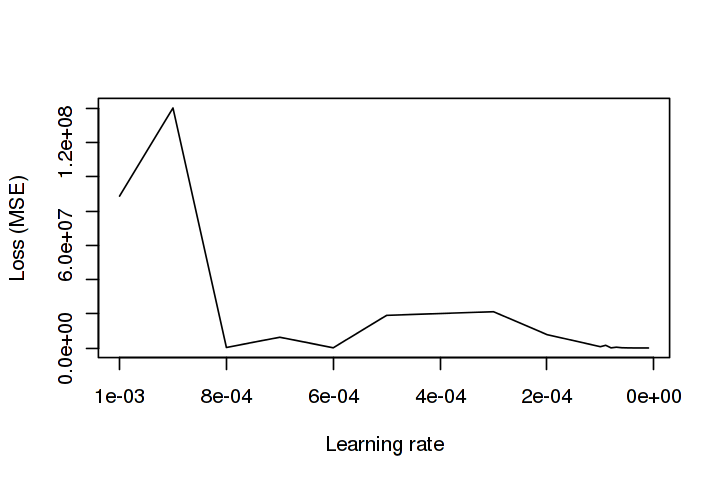

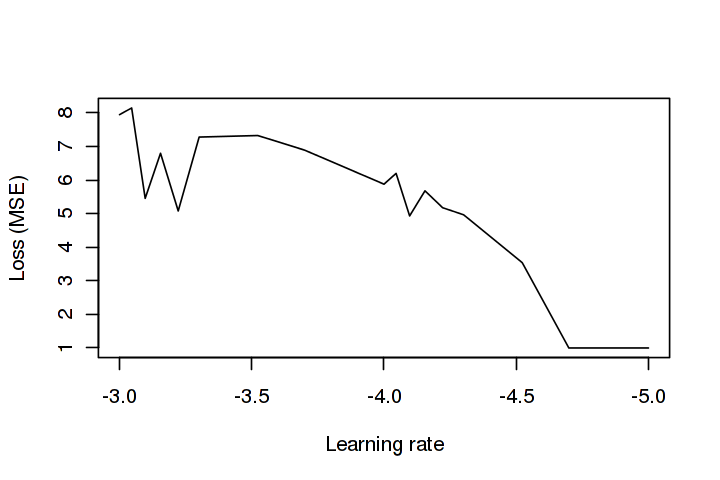

In [90]:
library(dplyr)
res <- res %>% arrange(learning_rate) 
res
options(repr.plot.width = 6, repr.plot.height = 4)
plot(res$loss ~ res$learning_rate, type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(res$learning_rate)))
plot(log10(res$loss) ~ log10(res$learning_rate), type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(log10(res$learning_rate))))

In [83]:
## iterating with the number of iterations
library(dplyr)
res <- NULL
number_iterations <- c(1e1,5e2,1e2,5e3,1e3,5e4,1e4,5e5,1e5,5e6,1e6,5e6,1e7)
for (iter in number_iterations) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, 1e-5, iter)
    res <- rbind(res, data.frame(cbind(num_iter=iter, gd)))
}


[1] "Optimal intercept: 0.861303488308978 Optimal slope: 0.0561343030152594"
[1] "Optimal intercept: 0.409777218775862 Optimal slope: 0.057661387916001"
[1] "Optimal intercept: 0.089956265155533 Optimal slope: 0.0587447279311118"
[1] "Optimal intercept: 0.75143963443057 Optimal slope: 0.0565040635995411"
[1] "Optimal intercept: 0.808024184643905 Optimal slope: 0.0563123928950758"
[1] "Optimal intercept: 3.64745901596276 Optimal slope: 0.046694282079488"
[1] "Optimal intercept: 0.913314645020955 Optimal slope: 0.0559557390622212"
[1] "Optimal intercept: 19.9340522831491 Optimal slope: -0.00847382994210306"
[1] "Optimal intercept: 5.985573604854 Optimal slope: 0.0387743097781503"
[1] "Optimal intercept: 29.5993340817854 Optimal slope: -0.0412133562653714"
[1] "Optimal intercept: 26.3713838830542 Optimal slope: -0.0302792145917712"
[1] "Optimal intercept: 29.5993257131288 Optimal slope: -0.041213327917946"
[1] "Optimal intercept: 29.5998547467984 Optimal slope: -0.0412151199310621"


num_iter,w,b,loss
1e+01,0.05613430,0.86130349,190.347127
1e+02,0.05874473,0.08995627,200.162969
5e+02,0.05766139,0.40977722,196.061512
1e+03,0.05631239,0.80802418,191.016779
5e+03,0.05650406,0.75143963,191.729331
1e+04,0.05595574,0.91331465,189.694611
5e+04,0.04669428,3.64745902,157.057107
1e+05,0.03877431,5.98557360,131.737974
5e+05,-0.00847383,19.93405228,30.322435
1e+06,-0.03027921,26.37138388,12.188335


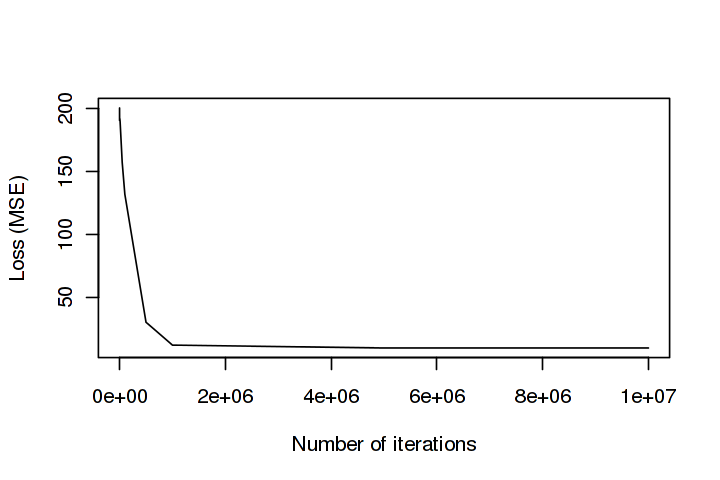

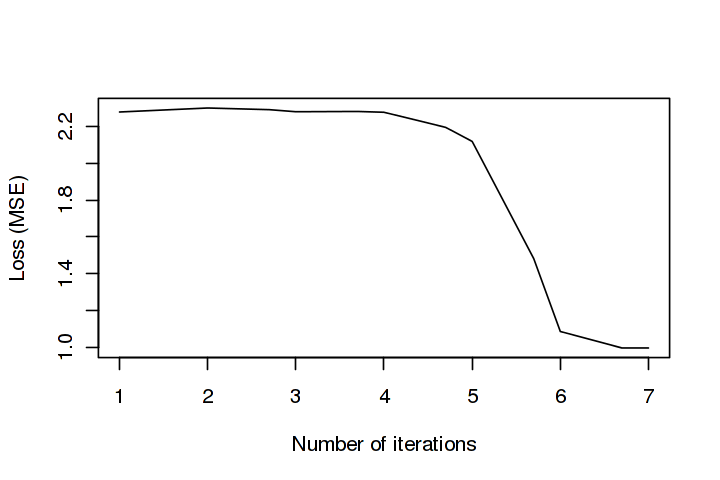

In [85]:
res <- res %>% arrange(num_iter)
res
options(repr.plot.width = 6, repr.plot.height = 4)
plot(res$loss ~ res$num_iter, type="l",xlab="Number of iterations", ylab="Loss (MSE)")
plot(log10(res$loss) ~ log10(res$num_iter), type="l",xlab="Number of iterations", ylab="Loss (MSE)")